# 여러그림 그리기
> 여러그림 그리기, Anscombe's quartet
- toc: true
- branch: master
- badges: true
- comments: true
- author: dinonene
- categories: [python]

`-` (1/2) 여러그림그리기

`-` (2/2) Anscombe's quartet

### 여러그림 그리기

#### (1) 겹쳐그리기

In [3]:
import numpy as np
import matplotlib.pyplot as plt

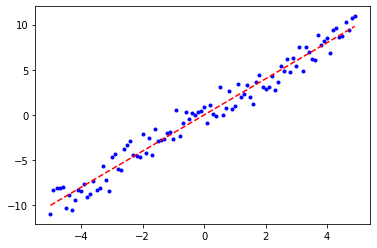

In [4]:
x=np.arange(-5,5,0.1)
y=2*x+np.random.normal(loc=0,scale=1,size=100)
plt.plot(x,y,'.b')
plt.plot(x,2*x,'--r')

#### (2) 따로그리기 -subplots

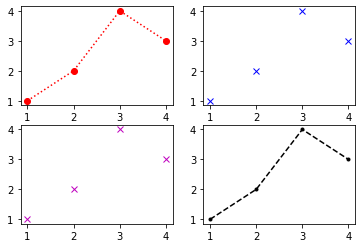

In [6]:
x=[1,2,3,4]
y=[1,2,4,3]
_, axs = plt.subplots(2,2)
axs[0,0].plot(x,y,'o:r')
axs[0,1].plot(x,y,'xb')
axs[1,0].plot(x,y,'xm')
axs[1,1].plot(x,y,'.--k')

> note: fmt = `[marker][line][color]`

```python
plt.subplots??

             # using the variable ax for single a Axes
            fig, ax = plt.subplots()

            # using the variable axs for multiple Axes
            fig, axs = plt.subplots(2, 2)

            # using tuple unpacking for multiple Axes
            fig, (ax1, ax2) = plt.subplots(1, 2)
            fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
            
            
            
            fig = figure(**fig_kw)
            axs = fig.subplots(nrows=nrows, ncols=ncols, sharex=sharex, sharey=sharey,
                       squeeze=squeeze, subplot_kw=subplot_kw,
                       gridspec_kw=gridspec_kw)
            return fig, axs
```

- subplots의 리턴값이 $\tt{(fig,axs)}$ 이 나오게 된다. 우리는 뒤의 axs만 관심이 있으므로 앞의 fig는 `_`로 처리한다.

### Anscombe's quartet

`-` 교훈: 데이터를 분석하기 전에 항상 시각화를 하라.

In [9]:
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

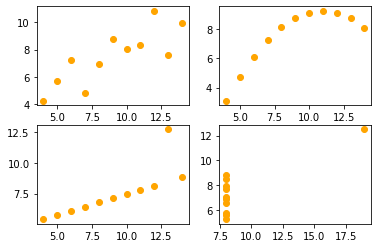

In [27]:
_, axs = plt.subplots(2,2)
axs[0,0].plot(x,y1,'o', color='orange')
axs[0,1].plot(x,y2,'o', color='orange')
axs[1,0].plot(x,y3,'o', color='orange')
axs[1,1].plot(x4,y4,'o', color='orange')

`-` 상관계수를 잠깐 복습해보자.

- 상관계수는 -1~1 사이의 값을 가진다. (코쉬슈바르츠 부등식을 사용하여 증명가능)
- 완전한 직선이라면 상관계수가 1 또는 -1이다.
- 상관계수가 1에 가까우면 양의 상관관계에 있다고 말하고 -1에 가까우면 음의 상관관계에 있다고 말한다.

`-` 의문: 자료의 모양이 직선모양에 가까우면 상관계수가 큰 것이 맞나?

- $x,y$ 값이 모두 큰 하나의 관측치가 상관계수값을 키울 수 있지 않나?

`-` 상관계수가 좋은 것은 맞나? (=상관계수는 두 변수의 관계를 설명하기에 충분히 적절한 통계량인가?)

In [15]:
n=len(x)
xtilde = (x-np.mean(x)) / (np.std(x)*np.sqrt(n)) ## x표준화
y1tilde = (y1-np.mean(y1)) / (np.std(y1)*np.sqrt(n)) ## y1표준화

In [16]:
sum(xtilde*y1tilde)

0.81642051634484

In [17]:
np.corrcoef(x,y1)

array([[1.        , 0.81642052],
       [0.81642052, 1.        ]])

In [18]:
np.corrcoef([x,y1,y2,y3])

array([[1.        , 0.81642052, 0.81623651, 0.81628674],
       [0.81642052, 1.        , 0.7500054 , 0.46871668],
       [0.81623651, 0.7500054 , 1.        , 0.58791933],
       [0.81628674, 0.46871668, 0.58791933, 1.        ]])

In [19]:
np.corrcoef([x4,y4])

array([[1.        , 0.81652144],
       [0.81652144, 1.        ]])

`-` 위의 4개의 그림에 대한 상관계수는 모두 같다. (0.81652)

`-` 상관계수는 두 변수의 관계를 설명하기에 부적절하다.

- 상관계수는 1번그림과 같이 두 변수가 선형관계에 있을 때 그 정도를 나타내는 통계량일 뿐이다.
- 선형관계가 아닌 것처럼 보이는 자료에서 상관계수를 계산할 수 있겠으나 의미가 없다.

`-` 교훈2: 기본적인 통계량들은 실제자료를 분석하기에 부적절할 수 있다. (=통계량은 적절한 가정이 동반되어야 의미가 있다.)

> note: 통계학자는 (1) 적절한 가정을 수학적인 언어로 정의하고 (2) 그 가정하에서 통계량이 의미있다는 것을 증명해야 한다. (3) 그리고 그 결과를 시각화하여 설득한다.